# 手写数字识别


### 问题：分类问题（10类）

### 输入：灰度图像（28×28个像素）

### 输出：分类0-9

# 0.超参数设置

In [1]:

"""
每次在训练集中提取64张图像进行批量化训练，目的是提高训练速度。
就好比搬砖，一次搬一块砖头的效率肯定要比一次能搬64块要低得多
"""
BATCH_SIZE = 64
#学习率，学习率一般为0.01，0.1等等较小的数，为了在梯度下降求解时避免错过最优解
LR = 0.001
"""
EPOCH 假如现在我有1000张训练图像，因为每次训练是64张，
每当我1000张图像训练完就是一个EPOCH，训练多少个EPOCH自己决定
"""
EPOCH = 1
"""
现在我要训练的训练集是系统自带的，需要先下载数据集，
当DOWNLOAD_MNIST为True是表示学要下载数据集，一但下载完，保存
然后这个参数就可以改为False，表示不用再次下载
"""
DOWNLOAD_MNIST = True


# 1.导入数据

### 原始数据（来自keras.datasets.mnist）

In [2]:
# 手动导入数据
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #mnist.load_data('路径')为下载并保存数据集位置，默认位置在C:\Users\管理员\.keras

In [3]:
'''
# pytorch导入

import torch
import torchvision
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader

#训练集
# 读取
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train = True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)

# 划分
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2 )
#每个batch_size的shape为[64, 1, 28, 28]
print("样本")
print(train_data.train_data.shape)
print(train_data.train_data[:3])
print("标签")
print(train_data.train_labels.shape)
print(train_data.train_labels[:3])



# 测试集
# 读取
test_data = torchvision.datasets.MNIST(
    root='./mnist',
    train = False,
)

# 处理

test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.0
"""
test_data.test_data中的shape为[10000, 28, 28]代表1w张图像，都是28x28，当时并未表明channels,因此在unsqueeze在1方向想加一个维度，
则shape变为[10000, 1, 28, 28]，然后转化为tensor的float32类型，取1w张中的2000张，并且将其图片进行归一化处理，避免图像几何变换的影响
"""
#标签取前2000
test_y = test_data.test_labels[:2000]

print("样本")
print(test_x.shape)
print(test_x[:3])
print("标签")
print(test_y.shape)
print(test_y[:3])


'''

'\n# pytorch导入\n\nimport torch\nimport torchvision\nfrom torch.autograd import Variable\nfrom torch.utils.data import Dataset, TensorDataset, DataLoader\n\n#训练集\n# 读取\ntrain_data = torchvision.datasets.MNIST(\n    root=\'./mnist\',\n    train = True,\n    transform=torchvision.transforms.ToTensor(),\n    download=DOWNLOAD_MNIST\n)\n\n# 划分\ntrain_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2 )\n#每个batch_size的shape为[64, 1, 28, 28]\nprint("样本")\nprint(train_data.train_data.shape)\nprint(train_data.train_data[:3])\nprint("标签")\nprint(train_data.train_labels.shape)\nprint(train_data.train_labels[:3])\n\n\n\n# 测试集\n# 读取\ntest_data = torchvision.datasets.MNIST(\n    root=\'./mnist\',\n    train = False,\n)\n\n# 处理\n\ntest_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.0\n"""\ntest_data.test_data中的shape为[10000, 28, 28]代表1w张图像，都是28x28，当时并未表明channels,因此在unsqueeze在1方向想加一个维度，\n则shape变为[10000, 

# 2.创建自己的Datasets数据集

from torch.utils.data import Dataset, TensorDataset ,DataLoader


>1.将数据转为tensor格式
>>`数据 = torch.tensor(mumpy数据)` 


>2.数据处理
>>图像数据处理：
>>>**图像数据列表维度shape：[图像数量,通道维数,图像长像素,图像宽像素]**  
>>>缺少通道维黑白图像处理:`图片样本data = Variable(torch.unsqueeze(图片样本data, dim=1), volatile=True).type(torch.FloatTensor)/255`  
>>>数据类型转换:`数据变量 = 数据变量.type(torch.FloatTensor)`

>>标签处理
>>>转换为one-hot编码:`标签labels = utils.to_categorical(标签labels)`  
>>>标签转换成long数据格式：`标签labels = 标签labels.long()`

>3.创建数据集
>>`数据集 = TensorDataset(样本data, 标签labels)`

>4.加载数据集
>>`train_loader = DataLoader(train_dataset, batch_size=120)`

In [4]:
'''
# 对分类标签y进行one-hot编码  utils.to_categorical(标签列表, num_classes=标签类别数, dtype='编码后标签格式')
from tensorflow.keras import utils

print("编码前")
print(train_labels)

train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

print("编码后")
print(train_labels)
'''

'\n# 对分类标签y进行one-hot编码  utils.to_categorical(标签列表, num_classes=标签类别数, dtype=\'编码后标签格式\')\nfrom tensorflow.keras import utils\n\nprint("编码前")\nprint(train_labels)\n\ntrain_labels = utils.to_categorical(train_labels)\ntest_labels = utils.to_categorical(test_labels)\n\nprint("编码后")\nprint(train_labels)\n'

In [5]:
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader

print(train_images)

# 1.把数据转换成tensor格式
train_images = torch.tensor(train_images)
train_labels = torch.tensor(train_labels)

test_images = torch.tensor(test_images)
test_labels = torch.tensor(test_labels)

print(train_images.shape)


# 2. 数据处理
# 将标签转换成long格式
train_labels = train_labels.long()
test_labels = test_labels.long()

# 图像数据调整增加维度 [图片数, 长, 宽]->[图片数, 通道数, 长, 宽], 将数据转为tensor的Float格式
train_images = Variable(torch.unsqueeze(train_images, dim=1), volatile=True).type(torch.FloatTensor)/255
test_images = Variable(torch.unsqueeze(test_images, dim=1), volatile=True).type(torch.FloatTensor)/255

print(train_images.shape)


# 3.创建数据集
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)


# 4.加载数据集
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader =DataLoader(test_dataset, batch_size=120)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
torch.Size([60000, 28, 28])
torch.Size([60000, 1, 28, 28])


<ipython-input-5-8705a23add60>:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  train_images = Variable(torch.unsqueeze(train_images, dim=1), volatile=True).type(torch.FloatTensor)/255
<ipython-input-5-8705a23add60>:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_images = Variable(torch.unsqueeze(test_images, dim=1), volatile=True).type(torch.FloatTensor)/255


# 3.构建网络

```python
# 导入包
import torch
from torch import nn, optim
import torch.nn.functional as F

# 定义神经网络类
class 自定义神经网络类名(nn.Module):
    # 可学习参数的层（如全连接层、卷积层等）
    def __init__(self):
        super().__init__()
        self.自定义layer名1 = nn.layer层(参数)
        self.自定义layer名2 = nn.layer层(参数)
        self.自定义layer名3 = nn.Sequential(
            nn.layer层(参数)，
            nn.layer层(参数)
        ）
        
    # 实现模型的功能，实现各个层之间的连接关系
    # nn.functional实现不具有可学习参数的层(如ReLU、dropout、BatchNormanation层)的构造
    def forward(self, x):
        x = self.自定义layer名1(x)
        x = F.不可学习参数层(x)
        x = self.自定义layer名2(x)
        x = 不可学习参数层(自定义layer名3(x)
        return x


# 实例化神经网络
model实例 = 自定义神经网络类名()


# 保存模型
torch.save(model实例, '存储路径')

# 加载模型
model = torch.load("model.pth")

```

#### ·可学习layer

>**卷积层**
>>nn.Conv2d(
>>&nbsp;&nbsp;&nbsp;  in_channels = 输入特征矩阵的深度,   
>>&nbsp;&nbsp;&nbsp;  out_channels = 卷积核数|输出特征矩阵深度,   
>>&nbsp;&nbsp;&nbsp;  kernel_size = (卷积核长, 卷积核宽),   
>>&nbsp;&nbsp;&nbsp;  stride = 卷积框步长,   
>>&nbsp;&nbsp;&nbsp;  padding = (填充上下行数, 填充左右列数),   
>>&nbsp;&nbsp;&nbsp;  dilation = 卷积核元素之间的间距1,   
>>&nbsp;&nbsp;&nbsp;  groups = 从输入通道到输出通道的阻塞连接数1,   
>>&nbsp;&nbsp;&nbsp;  bias = 添加偏置T/F,   
>>&nbsp;&nbsp;&nbsp;  padding_mode = '填充数字zeros'  
>>)

>>说明：
>>>in_channels = 输入通道维的元素数  
>>>图像(通道，图像长，图像宽)（黑白图像通道=1，RGB图像通道=3）   
>>>out_channels = 提取特征数 = 输出特征矩阵深度 = 输出特征矩阵通道维

>**全连接层**
>>nn.Linear(in_features=每个输入样本的大小, out_features=每个输出样本的大小)  
>>说明：


#### ·不可学习layer
>**将多维数据转成一维**
>>x.view(x.size(0), -1)  
>>说明：在卷积层转全连接层之间使用，用在forward(self, x)中

In [6]:
# 主干网络

import torch
from torch import nn, optim
import torch.nn.functional as F


# 定义神经网络类
class CNN(nn.Module):
    # 可学习参数的层（如全连接层、卷积层等）
    def __init__(self):
        super().__init__()
        
        # 第一部分卷积层1
        self.conv1 = nn.Sequential(
            # 卷积层(输入通道维1，输出通道维16，卷积窗口3*3)
            nn.Conv2d(1, 16, kernel_size=(3,3), stride=1, padding=1),  # 维度变换(1,28,28) （黑白图像1通道，长28像素，宽28像素）->(16,28,28) （16个卷积核提取16个特征通道，长28，宽28）图像边缘扩展，没被卷积抛去
            # 激活函数
            nn.ReLU(),
            # 池化层
            nn.MaxPool2d(2) # 维度变化(16,28,28)->(16,14,14)
        )
            
        #第二部分卷积层2
        self.conv2 = nn.Sequential(
            # 卷积层(输入通道维16，输出通道维32，卷积窗口3*3)
            nn.Conv2d(16, 32, kernel_size=(3,3), stride=1, padding=1),  # 维度变换(16,14,14)->(32,14,14)
            # 激活函数
            nn.ReLU(),
            # 池化层
            nn.MaxPool2d(2) # 维度变化(32,14,14)->(32,7,7)
        )
            
        # 全连接层
        self.out = nn.Linear(32*7*7, 10)
            
            
        
    # 实现模型的功能，实现各个层之间的连接关系
    # nn.functional实现不具有可学习参数的层(如ReLU、dropout、BatchNormanation层)的构造
    def forward(self, x):
        # 执行卷积层1 conv1
        x = self.conv1(x)
        # 执行卷积层2 conv2
        x = self.conv2(x)
        # 将图像数据转为1维
        x = x.view(x.size(0),-1)
        # 执行全连接层 out
        x = self.out(x)
        return x
    

# 4.训练模型


#### 方法一 ：利用torchkeras包训练

(需要torchkeras支持)  
import from torchkeras import summary,Model 

1.实例化模型  
```
model = Model(自定义神经网络类名())
```

2.编译模型
```
model.compile(loss_func = 损失函数,
             optimizer= 优化方法,
             metrics_dict={"accuracy":accuracy})
```

3.训练模型
```
dfhistory = model.fit(训练次数,train_loader, test_loader, log_step_freq=100) 
```

In [7]:
from torchkeras import summary,Model

# 实例化模型
model = Model(CNN())
model = model.float()

# 查看模型
print(model)
print(summary(model, input_shape=(1,28,28)))

Model(
  (net): CNN(
    (conv1): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (conv2): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (out): Linear(in_features=1568, out_features=10, bias=True)
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           4,640
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1,

In [8]:
from sklearn.metrics import accuracy_score

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    return accuracy_score(y_true.numpy(),y_pred_cls.numpy())


In [9]:

model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.Adam(model.parameters(),lr = 0.02),
             metrics_dict={"accuracy":accuracy})


In [10]:

dfhistory = model.fit(3,train_loader, test_loader, log_step_freq=100) 



Start Training ...

================================================================================2022-07-04 15:55:44
{'step': 100, 'loss': 0.451, 'accuracy': 0.853}
{'step': 200, 'loss': 0.293, 'accuracy': 0.905}
{'step': 300, 'loss': 0.241, 'accuracy': 0.923}
{'step': 400, 'loss': 0.211, 'accuracy': 0.934}
{'step': 500, 'loss': 0.19, 'accuracy': 0.94}
{'step': 600, 'loss': 0.176, 'accuracy': 0.944}
{'step': 700, 'loss': 0.167, 'accuracy': 0.947}
{'step': 800, 'loss': 0.159, 'accuracy': 0.95}
{'step': 900, 'loss': 0.151, 'accuracy': 0.953}

 +-------+-------+----------+----------+--------------+
| epoch |  loss | accuracy | val_loss | val_accuracy |
+-------+-------+----------+----------+--------------+
|   1   | 0.149 |  0.953   |  0.068   |     0.98     |
+-------+-------+----------+----------+--------------+

================================================================================2022-07-04 15:56:01
{'step': 100, 'loss': 0.081, 'accuracy': 0.978}
{'step': 200, 'loss': 0.0

In [11]:
# 保存模型 .save('模型.h5')

torch.save(model,'pytorch_number_model.h5')


#### 方法二：手动训练

1.实例化模型
```
model变量 = 自定义神经网络类名()
```

2.定义损失函数和优化器
```
loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model变量.parameters(), lr = 学习率) 
```

3.训练模型
```
for epoch in range(训练轮数):  # 训练轮数
    
    # 遍历训练集每条数据，进行训练 
    running_loss = 0.0 # 记录一轮中每条训练数据预测的损失累加
    for step, (x, y) in enumerate(训练集加载train_loader):   #【enumerate()枚举对象 得到格式（id，元素）】
        b_x = Variable(x) # 数据x
        b_y = Variable(y) # 标签y
    
        output = model_2(b_x) # 把数据输入进网络
        loss = loss_func(output, b_y) # 计算一条数据的损失
        running_loss += loss.item() # 损失累加
        
        optimizer.zero_grad() # 梯度置零
        loss.backward()  # loss反向传播
        optimizer.step() # 反向传播后参数更新
        
    
    print('训练轮数：', epoch, ' 平均损失：',running_loss/len(train_loader)) #平均损失=每轮每条训练数据损失求和/每轮训练数据数

```

In [12]:
# 初始化模型
model_2 = CNN()

# 查看模型
print(model_2)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [13]:
# 损失函数
loss_func = nn.CrossEntropyLoss()

# 优化器
optimizer = torch.optim.Adam(model_2.parameters(), lr = 0.02) 

In [14]:
from torch.autograd import Variable

EPOCH = 3 # 训练轮数

#记录用于绘图
losses = []#记录每次迭代后训练的loss
eval_losses = []#测试的



# 自定义训练方法

for epoch in range(EPOCH):  # 训练轮数
    # 遍历训练集每条数据，进行训练，得到每轮损失loss
    running_loss = 0.0
    for step, (x, y) in enumerate(train_loader):   #【enumerate()枚举对象 得到格式（id，元素）】
        b_x = Variable(x) # 数据x
        b_y = Variable(y) # 标签y
    
        output = model_2(b_x) # 把数据输入进网络
        loss = loss_func(output, b_y) # 计算一条数据的损失
        running_loss += loss.item() # 损失累加
        
        optimizer.zero_grad() # 梯度置零
        loss.backward()  # loss反向传播
        optimizer.step() # 反向传播后参数更新
    
    losses.append(running_loss/len(train_loader)) # 记录该轮平均损失，后续用于画图
    print('训练轮数：', epoch, ' 训练平均损失loss：',running_loss/len(train_loader)) #平均损失=每轮每条训练数据损失求和/每轮训练数据数
    
    
    
    # 遍历测试集每条数据，进行测试，每轮训练后损失val_loss
    running_loss = 0.0
    for step, (x, y) in enumerate(test_loader): 
        b_x = Variable(x) # 数据x
        b_y = Variable(y) # 标签y
        
        output = model_2(b_x) # 把数据输入进网络
        loss = loss_func(output, b_y) # 计算一条数据的损失
        running_loss += loss.item() # 损失累加
    
    eval_losses.append(running_loss/len(test_loader)) # 记录该轮平均损失，后续用于画图
    print('训练轮数：', epoch, ' 测试平均损失val_loss：',running_loss/len(test_loader)) #平均损失=每轮每条训练数据损失求和/每轮训练数据数
    
        
    
print('end') 
    

训练轮数： 0  训练平均损失loss： 0.22131887940801123
训练轮数： 0  测试平均损失val_loss： 0.12813471588084385
训练轮数： 1  训练平均损失loss： 0.13678165808119483
训练轮数： 1  测试平均损失val_loss： 0.12506504611311747
训练轮数： 2  训练平均损失loss： 0.13559626766553978
训练轮数： 2  测试平均损失val_loss： 0.1099744760514503
end


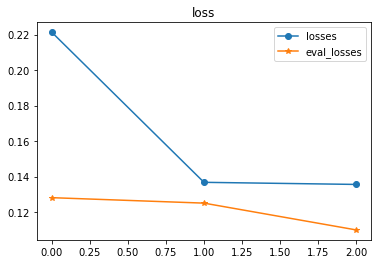

In [15]:
# 画图
import matplotlib.pyplot as plt

plt.plot(range(len(losses)), losses, marker='o',label='losses')
plt.plot(range(len(eval_losses)), eval_losses, marker='*',label='eval_losses')
plt.legend() #图例
plt.title("loss") #标题

plt.show()

In [16]:
# 保存模型 .save('模型.h5')

torch.save(model_2,'pytorch_number_model_2.h5')

# 5.模型预测

In [17]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchkeras import summary,Model
from sklearn.metrics import accuracy_score


# 加载模型

#方法一训练模型
model = torch.load('pytorch_number_model.h5')
#方法二训练模型
model_2 = torch.load('pytorch_number_model.h5')

图片原始格式: (4, 28, 28)
标签： [1 0 4 1]
图片转换成tensor格式后： torch.Size([4, 28, 28])


<function matplotlib.pyplot.show(close=None, block=None)>

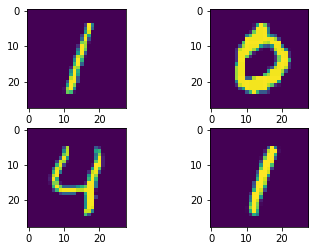

In [18]:
# 手动导入预测数据
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt



(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

# 取前4张图片
test_images = test_images[2:6]
test_labels = test_labels[2:6]
print('图片原始格式:', test_images.shape)
print('标签：', test_labels)

# 图片格式转换成tensor格式
test_images = torch.tensor(test_images)
print('图片转换成tensor格式后：', test_images.shape)

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(test_images[i])
plt.show




In [19]:
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader

# 图片类型转换成FloatTensor(预测和训练数据类型一致)
test_images = test_images.type(torch.FloatTensor)/255

print(test_images.shape)
print(test_images)


torch.Size([4, 28, 28])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0.

In [20]:
# 为图片格式添加通道维
pic = test_images[0:4]

pic = pic.reshape(4,1,28,28)
print('添加通道维度', pic.shape)

添加通道维度 torch.Size([4, 1, 28, 28])


#### 方法一模型预测

In [21]:
# 预测模式

output = model(pic)
print(output)

print('------')
# 按行找到一行内值最大的列号
prediction = torch.max(output, dim=1)
print(prediction)

tensor([[ -8.4236,   8.2486,  -1.8376,  -6.6493,   0.0400,  -6.6488,  -4.3144,
          -5.2530,  -1.7184,  -6.1824],
        [ 11.8111, -13.9780,   0.6713,  -7.1739,  -4.0893,  -9.0231,  -0.4696,
          -9.4936,  -2.8910,  -3.7154],
        [ -8.5749, -12.0176,  -5.6263,  -8.8580,  11.6805, -14.2282, -10.1831,
          -6.0848,  -6.8095,   0.3448],
        [ -7.2165,   8.5743,  -1.8384,  -9.5966,   1.1469,  -7.3106,  -5.4645,
          -2.2575,  -1.0350,  -5.6951]], grad_fn=<AddmmBackward>)
------
torch.return_types.max(
values=tensor([ 8.2486, 11.8111, 11.6805,  8.5743], grad_fn=<MaxBackward0>),
indices=tensor([1, 0, 4, 1]))


#### 方法二模型预测

In [22]:
output = model_2(pic)
print(output)

print('------')
# 按行找到一行内值最大的列号
prediction = torch.max(output, dim=1)
print(prediction)

tensor([[ -8.4236,   8.2486,  -1.8376,  -6.6493,   0.0400,  -6.6488,  -4.3144,
          -5.2530,  -1.7184,  -6.1824],
        [ 11.8111, -13.9780,   0.6713,  -7.1739,  -4.0893,  -9.0231,  -0.4696,
          -9.4936,  -2.8910,  -3.7154],
        [ -8.5749, -12.0176,  -5.6263,  -8.8580,  11.6805, -14.2282, -10.1831,
          -6.0848,  -6.8095,   0.3448],
        [ -7.2165,   8.5743,  -1.8384,  -9.5966,   1.1469,  -7.3106,  -5.4645,
          -2.2575,  -1.0350,  -5.6951]], grad_fn=<AddmmBackward>)
------
torch.return_types.max(
values=tensor([ 8.2486, 11.8111, 11.6805,  8.5743], grad_fn=<MaxBackward0>),
indices=tensor([1, 0, 4, 1]))
